In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('uber.csv')

In [6]:
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [12]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         199999 non-null  int64              
 1   key                199999 non-null  object             
 2   fare_amount        199999 non-null  float64            
 3   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 4   pickup_longitude   199999 non-null  float64            
 5   pickup_latitude    199999 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [23]:
import calendar
df['year']=df["pickup_datetime"].apply(lambda x:x.year)
df['month']=df["pickup_datetime"].apply(lambda x:x.month)
df['day']=df["pickup_datetime"].apply(lambda x:x.day)
df['hour']=df["pickup_datetime"].apply(lambda x:x.hour)
df['weekday']=df["pickup_datetime"].apply(lambda x:calendar.day_name[x.weekday()])

In [25]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df['weekday']=l.fit_transform(df['weekday'])

In [28]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,4
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,4


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\bodda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passenger_count'>

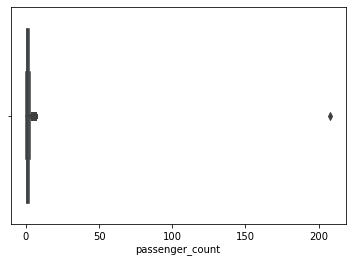

In [30]:

sns.boxplot(df['passenger_count'])


C:\Users\bodda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pickup_longitude'>

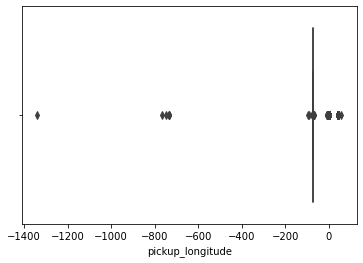

In [31]:
sns.boxplot(df['pickup_longitude'])

In [32]:
r = df.corr()

In [33]:
r

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday
Unnamed: 0,1.000000,0.000587,0.000230,-0.000341,0.000270,0.000271,0.002259,-0.001325,0.001299,0.000556,0.000044,0.002870
fare_amount,0.000587,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158,0.118331,0.023813,0.001384,-0.021463,-0.002616
pickup_longitude,0.000230,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415,0.009966,-0.004665,0.005183,0.002432,0.001268
pickup_latitude,-0.000341,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559,-0.010234,0.004625,-0.008263,-0.003821,0.001296
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033,0.008467,-0.003605,0.005055,0.003478,0.002054
dropoff_latitude,0.000271,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659,-0.011239,0.003818,-0.007835,-0.002544,-0.001590
passenger_count,0.002259,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000,0.004802,0.009774,0.003242,0.013187,-0.012186
year,-0.001325,0.118331,0.009966,-0.010234,0.008467,-0.011239,0.004802,1.000000,-0.115860,-0.012165,0.002162,-0.004425
month,0.001299,0.023813,-0.004665,0.004625,-0.003605,0.003818,0.009774,-0.115860,1.000000,-0.017358,-0.003924,0.000627
day,0.000556,0.001384,0.005183,-0.008263,0.005055,-0.007835,0.003242,-0.012165,-0.017358,1.000000,0.004664,-0.008229


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
df['pickup_datetime']=df['pickup_datetime'].apply(lambda x : x.value)
x = df.iloc[:,3:]

x

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday
0,1431028326000000000,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,4
1,1247861096000000000,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,0
2,1251150300000000000,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,1
3,1246004541000000000,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,0
4,1409248020000000000,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,4
...,...,...,...,...,...,...,...,...,...,...,...
199995,1351421340000000000,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,10,3
199996,1394759340000000000,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,1,0
199997,1246236120000000000,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,0,1
199998,1432133785000000000,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,14,6


In [36]:
y = df['fare_amount']
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 199999, dtype: float64

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [38]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
result = lr.predict(x_test)

In [40]:
from sklearn.metrics import mean_squared_error

In [42]:
import numpy as np

In [43]:
rms = np.sqrt(mean_squared_error(result,y_test))
rms

9.840769831808183

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf = RandomForestRegressor(n_estimators=100, random_state=1)

In [46]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [47]:
rf_result = rf.predict(x_test)
rf_result

array([11.3154,  5.455 ,  8.15  , ..., 10.66  ,  6.022 , 14.968 ])

In [48]:
rf_rms = np.sqrt(mean_squared_error(rf_result,y_test))
rf_rms

4.3655765164850795